# Data Parsing 

Load dataset into Jupyter

We are going to parse the dataS2_ass3.XML file. 

1. Inside the file, we can see date, address, price, solddate and the other features/columns for the house records.
2. Once we have parsed the document, we will print out the "node name" of the root of the document.
3. We will use package "bs4" to import the BeautifulSoup object and load the data in pandas dataframe.

We are also going to parse the dataS1_ass3.csv file.

1. Inside the file, we can see date, address, price, and the other features/columns similar to dataS2_ass3 with some extra   columns.
2. We open the file and read the csv using pandas and also load the data in pandas dataframe. 

# Data Integration

Data Integration is a data preprocessing technique that merges the data from multiple heterogeneous data sources into a coherent data store. Data integration may involve inconsistent data and therefore needs data cleaning.

Here we have data from 2 sources:

1. XML file data and from a CSV file. 

2. WE can see from the XML by opening in notepad++ & the CSV that there are common columns plus some extra columns. 

Global schema definition : A mapping M (Global Schema) between S (XML data source) and G (CSV data source).

A general condition: the source and our view of the global schema should satisfy the conditions imposed by the mapping
M.

#column name: column type
#date : date
#price : int64
#solddate : date
#bedrooms : int64
#bathrooms : float64
#sqft_living : int64
#sqft_lot : int64
#floors : int64
#waterfront : bool
#view : int64
#condition : int64
#sqft_above : int64
#sqft_basement : int64
#yr_built : int64 yr_renovated : int64
#street : object
#city : object
#statezip : object
#country : object

common_columns = ['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',  'waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated', 'street','city','statezip','country']

global_columns = common_columns + ['solddate','condition','state']

In [2]:
# Load the file
from bs4 import BeautifulSoup
f = open('dataS2_ass3.XML', 'r')
soup = BeautifulSoup(f)
# Shows the structure of the node elements
print soup.currentTag

C:\Program Files\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Program Files\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


<?xml version="1.0"?><html><body><records><record>
<date>2014-07-19</date>
<address>10515, 115th Place Northeast, Juanita, Kirkland, King County, Washington, 98033, United States of America</address>
<price>630000</price>
<solddate>2014-07-09</solddate>
<bedrooms>3</bedrooms>
<bathrooms>1.75</bathrooms>
<livingarea unit="sqm">158.8641984</livingarea>
<lotarea unit="sqm">814.48095168</lotarea>
<floors>1.0</floors>
<waterfront></waterfront>
<view></view>
<upperarea unit="sqm">158.8641984</upperarea>
<basementarea></basementarea>
<buildyear>1986</buildyear>
<renovateyear>0</renovateyear>
</record>
<record>
<date>2014-07-10</date>
<address>1501, Northwest 90th Street, Ballard, Seattle, King County, Washington, 98117, United States of America</address>
<price>599950</price>
<solddate>2014-07-09</solddate>
<bedrooms>3</bedrooms>
<bathrooms>3.25</bathrooms>
<livingarea unit="sqm">170.0125632</livingarea>
<lotarea unit="sqm">167.59708416</lotarea>
<floors>3.0</floors>
<waterfront></waterfront>

In [3]:
# Root node <record>
# Store all elements within the root node in variables
date = soup.find_all('date')
address = soup.find_all('address')
price = soup.find_all('price')
solddate = soup.find_all('solddate')
bedrooms = soup.find_all('bedrooms')
bathrooms = soup.find_all('bathrooms')
livingarea = soup.find_all('livingarea')
lotarea = soup.find_all('lotarea')
floors = soup.find_all('floors')
waterfront = soup.find_all('waterfront')
view = soup.find_all('view')
upperarea = soup.find_all('upperarea')
basementarea = soup.find_all('basementarea')
buildyear = soup.find_all('buildyear')
renovateyear = soup.find_all('renovateyear')

In [4]:
# Create a dictionary to store values of all the variables

data = {
    'date' : [],
    'address' : [],
    'price' : [],
    'solddate' :[],
    'bedrooms' :[],
    'bathrooms':[],
    'livingarea':[],
    'lotarea':[],
    'floors':[],
    'waterfront':[],
    'view':[],
    'upperarea':[],
    'basementarea':[],
    'buildyear':[],
    'renovateyear':[]
}

# Loop till number of rows in each record

for i in range(0, len(soup.find_all('record'))):
    
    data['date'].append(date[i].get_text())
    data['address'].append(address[i].get_text())
    data['price'].append(price[i].get_text())
    data['solddate'].append(solddate[i].get_text())
    data['bedrooms'].append(bedrooms[i].get_text())
    data['bathrooms'].append(bathrooms[i].get_text())
    data['livingarea'].append(livingarea[i].get_text())
    data['lotarea'].append(lotarea[i].get_text())
    data['floors'].append(floors[i].get_text())
    data['waterfront'].append(waterfront[i].get_text())
    data['view'].append(view[i].get_text())
    data['upperarea'].append(upperarea[i].get_text())
    data['basementarea'].append(basementarea[i].get_text())
    data['buildyear'].append(buildyear[i].get_text())
    data['renovateyear'].append(renovateyear[i].get_text())

In [5]:
# Load the data into a dataframe

cols = ['date', 'address', 'price', 'solddate', 'bedrooms', 'bathrooms', 'livingarea', 
        'lotarea', 'floors', 'waterfront', 'view', 'upperarea', 'basementarea', 'buildyear', 'renovateyear']

# Create a dataframe 

import pandas as pd

df = pd.DataFrame(data, columns = cols)

In [6]:
# dimension of the dataset using the shape method
print df.shape

# overview of data using the head and tail method
print df.head()
print df.tail()

(430, 15)
         date                                            address   price  \
0  2014-07-19  10515, 115th Place Northeast, Juanita, Kirklan...  630000   
1  2014-07-10  1501, Northwest 90th Street, Ballard, Seattle,...  599950   
2  2014-07-16  537, North 70th Street, Phinney Ridge, Seattle...  680000   
3  2014-07-13  12008, 35th Avenue Northeast, Cedar Park, Lake...  335500   
4  2014-07-18  11807, Northeast 105th Court, Juanita, Kirklan...  379000   

     solddate bedrooms bathrooms   livingarea       lotarea floors waterfront  \
0  2014-07-09        3      1.75  158.8641984  814.48095168    1.0              
1  2014-07-09        3      3.25  170.0125632  167.59708416    3.0              
2  2014-07-09        3       2.0  165.3674112   531.4053888    1.0              
3  2014-07-09        3       1.0  127.2771648   629.8826112    2.0              
4  2014-07-09        3       2.5  142.1416512  270.62655552    2.0              

  view    upperarea basementarea buildyear ren

In [7]:
# waterfront, view, basement have blank (white spaces), replace that with NaN
import numpy as np

# isinstance is used to check the type, returns true if correct data type

df['waterfront'] = df['waterfront'].apply(lambda s : s.str.strip() if isinstance(s, str) else s).replace('', np.nan)
df['view'] = df['view'].apply(lambda s : s.str.strip() if isinstance(s, str) else s).replace('', np.nan)
df['basementarea'] = df['basementarea'].apply(lambda s : s.str.strip() if isinstance(s, str) else s).replace('', np.nan)

Check missing values

info() 

tells us total number of records
gives us details on datatype, 'object' here means string, the others are int and float
also include see 'non-null' observations for each data column

describe() 

by default tabulates numeric data, which report on:
descriptive statistics
number of non-null observations in "count"

with "include='all'" will include all columns and "include=['O']" will include objects
.isnull().sum()*
will return sum of missing values for each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 15 columns):
date            430 non-null object
address         430 non-null object
price           430 non-null object
solddate        430 non-null object
bedrooms        430 non-null object
bathrooms       430 non-null object
livingarea      430 non-null object
lotarea         430 non-null object
floors          430 non-null object
waterfront      3 non-null object
view            34 non-null object
upperarea       430 non-null object
basementarea    181 non-null object
buildyear       430 non-null object
renovateyear    430 non-null object
dtypes: object(15)
memory usage: 50.5+ KB


waterfront, view and basementarea have few values missing but that may be exceptable as all houses won't have it.

In [9]:
df.isnull().sum()

date              0
address           0
price             0
solddate          0
bedrooms          0
bathrooms         0
livingarea        0
lotarea           0
floors            0
waterfront      427
view            396
upperarea         0
basementarea    249
buildyear         0
renovateyear      0
dtype: int64

# Load the other dataS1_ass3.csv file


In [10]:
df1 = pd.read_csv('dataS1_ass3.csv')

In [11]:
# dimension of the dataset using the shape method
print df1.shape

# overview of data using the head and tail method
print df1.head()
print df1.tail()

(4600, 18)
              date    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20140502T000000   313000         3       1.50         1340      7912   
1  20140502T000000  2384000         5       2.50         3650      9050   
2  20140502T000000   342000         3       2.00         1930     11947   
3  20140502T000000   420000         3       2.25         2000      8030   
4  20140502T000000   550000         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip 

Check missing values
info()
tells us total number of records gives us details on datatype, 'object' here means string, the others are int and float also include see 'non-null' observations for each data column

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null int64
bedrooms         4600 non-null int64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     224 non-null float64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(3), int64(10), object(5)
memory usage: 646.9+ KB


In [13]:
# Count the number of missing values in each column

df1.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     4376
street              0
city                0
statezip            0
country             0
dtype: int64

## Task 1: Integration between df and df1

Each data collection might have different attributes

Merge them together to get a complete yet precise (with no duplication) 

Find all the common columns and join them both to get global columns

Manage the data integration task



#Global scheme definition
#column name: column type
#date : date
#price : int64
#solddate : date
#bedrooms : int64
#bathrooms : float64
#sqft_living : int64
#sqft_lot : int64
#floors : int64
#waterfront : bool
#view : int64
#condition : int64
#sqft_above : int64
#sqft_basement : int64
#yr_built : int64
 yr_renovated : int64
#street : object
#city : object
#statezip : object
#country : object

common_columns = ['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                  'waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated',
                  'street','city','statezip','country']
global_columns = common_columns + ['solddate','condition','state']



# Dataframe df['address'] can be split into street, city, state, zip and country

In [14]:
print df.address.head()

0    10515, 115th Place Northeast, Juanita, Kirklan...
1    1501, Northwest 90th Street, Ballard, Seattle,...
2    537, North 70th Street, Phinney Ridge, Seattle...
3    12008, 35th Avenue Northeast, Cedar Park, Lake...
4    11807, Northeast 105th Court, Juanita, Kirklan...
Name: address, dtype: object


In [15]:
# Get the length of addresses to split
l = list()
for index, row in df.iterrows():
    l.append(len(row['address'].split(',')))
print set(l)

set([5, 6, 7, 8, 9, 10])


In [16]:
# Research address field. Want to split to get individual fields, length however is different.
from collections import defaultdict
lengthdict = defaultdict(list)
for i, row in df.iterrows():
    splitted = row['address'].split(',')
    length = len(splitted)
    if length not in lengthdict.keys():
        lengthdict[length].append(row['address'])
for item in lengthdict.keys():
    print item, lengthdict[item]

5 [u'290th Avenue Southeast, Hobart, King County, Washington, United States of America']
6 [u'Southeast 183rd Street, Maple Heights-Lake Desire, King County, Washington, 98058, United States of America']
7 [u'5148, South Creston Street, Seattle, King County, Washington, 98178, United States of America']
8 [u'10515, 115th Place Northeast, Juanita, Kirkland, King County, Washington, 98033, United States of America']
9 [u'12008, 35th Avenue Northeast, Cedar Park, Lake City, Seattle, King County, Washington, 98125, United States of America']
10 [u'Fire Station 34, 633, 32nd Avenue East, Broadmoor, Washington Park, Seattle, King County, Washington, 98112, United States of America']


In [17]:
#  Split address to individual fields based on patterns above.
for i, row in df.iterrows():
    splitted = row['address'].split(',')
    length = len(splitted)
    country = splitted[length - 1]
    
    if length == 5:
        zipcode = 0
        state = splitted[length - 2]
        city = splitted[length - 4] 
    else:
        zipcode = splitted[length - 2]
        state = splitted[length - 3]
        city = splitted[length - 5]   
    if length <= 6:
        street = splitted[0]
    else:
        streetno = splitted[0]
        street = splitted[1]
    df.set_value(index=i, col='country', value=country)
    df.set_value(index=i, col='zipcode', value=zipcode)
    df.set_value(index=i, col='state', value=state)
    df.set_value(index =i, col='city', value=city)
    df.set_value(index=i, col='street', value=street)
    df.set_value(index =i, col='streetno', value=streetno)

# Drop the address column
df.drop('address', axis=1, inplace=True)
df['country'] = df['country'].str.replace('United States of America', 'USA').str.strip()
df['state'] =df['state'].str.replace('Washington', 'WA').str.strip()           
  
    
        
        

# Dataframe df1['statezip'] can be split into state and zipcode


In [18]:
#  Split statezip to individual fields

df1['zipcode'] = df1['statezip'].apply(lambda s: s.split(' ')[1])
df1['state'] = df1['statezip'].apply(lambda s: s.split(' ')[0])

# Drop the statezip column
df1.drop('statezip', axis=1, inplace=True)



# Dataframe df1['street'] can be split into streetno, street

In [19]:
# Research street field. Want to split to get individual fields, length however is different.
from collections import defaultdict
lengthdict = defaultdict(list)
for i, row in df1.iterrows():
    splitted = row['street'].split(' ')
    length = len(splitted)
    if length not in lengthdict.keys():
        lengthdict[length].append(row['street'])
for item in lengthdict.keys():
    print item, lengthdict[item]

2 ['Burke-Gilman Trail']
3 ['1036 4th St']
4 ['18810 Densmore Ave N']
5 ['7528 N Fork Rd SE']
6 ['1804 E Beaver Lake Dr SE']
7 ['25408 Lake Wilderness Country Club Dr SE']


In [20]:
# Split the street address into street no and street name
for i, row in df1.iterrows():
    splitted = row['street'].split(' ')
    length = len(splitted)
    if length == 2:
        streetno = 0
    else:
        streetno = splitted[0]
        street_1 = splitted[1:]
        street_1 = (str(street_1).strip('[]')).replace("'", "")
        
    df1.set_value(i, 'streetno', streetno)
    df1.set_value(i, 'street_1', street_1)
df1.drop('street', axis=1, inplace=True)
df1= df1.rename(columns={'street_1':'street'})

In [21]:
# Check the columns after making the changes 

print df.columns
print df1.columns

Index([u'date', u'price', u'solddate', u'bedrooms', u'bathrooms',
       u'livingarea', u'lotarea', u'floors', u'waterfront', u'view',
       u'upperarea', u'basementarea', u'buildyear', u'renovateyear',
       u'country', u'zipcode', u'state', u'city', u'street', u'streetno'],
      dtype='object')
Index([u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated', u'city',
       u'country', u'zipcode', u'state', u'streetno', u'street'],
      dtype='object')


# Renaming the columns so both dataframe have the same column names for common elements

In [22]:
df.rename(columns= {'livingarea': 'sqft_living', 'lotarea':'sqft_lot', 'upperarea':'sqft_above', 'basementarea':'sqft_basement',
                        'buildyear':'yr_built', 'renovateyear':'yr_renovated'}, inplace=True)


In [23]:
print df.dtypes
print df1.dtypes

date             object
price            object
solddate         object
bedrooms         object
bathrooms        object
sqft_living      object
sqft_lot         object
floors           object
waterfront       object
view             object
sqft_above       object
sqft_basement    object
yr_built         object
yr_renovated     object
country          object
zipcode          object
state            object
city             object
street           object
streetno         object
dtype: object
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
city              object
country           object
zipcode           object
state             object
streetno          object
street            object
dtype:

# Change the data types to correct format

In [24]:
# Replace NaN with 0 for int data types
df['view'] = df['view'].fillna(0)


# type changes
df1['date'] = df1['date'].astype(str).str[0:8] # Select first eight characters
df1['date'] = pd.to_datetime(df1['date'], format="%Y-%m-%d")

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

df['solddate'] = pd.to_datetime(df['solddate'], format="%Y-%m-%d")
df['price'] = df[['price']].astype(int)
df['bedrooms'] = df[['bedrooms']].astype(int)
df['bathrooms'] = df[['bathrooms']].astype(float)
df['sqft_living'] = df[['sqft_living']].astype(float)
df['sqft_lot'] = df[['sqft_lot']].astype(float)
df['waterfront'] = df[['waterfront']].astype(bool)
df['view'] = df[['view']].astype(int)
df['yr_built'] = df[['yr_built']].astype(int)
df['yr_renovated'] = df[['yr_renovated']].astype(int)

# Data Integration (mapping and merging data)

After resolving the below schema conflicts and joining to dataframes using pandas.


#Research df['address'] field. Want to split to get individual fields, length however is different.
#Split statezip to individual fields
#Renaming the columns with same data so both dataframe have the same column names
#Changing the data types to same format for common columns
#Changing the index of column to desired columns

In [25]:
houses_data = pd.concat([df1, df])
houses_data = houses_data.reindex (columns=['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 
                                            'waterfront', 'view', 'condition','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                                            'streetno', 'street', 'city', 'state', 'zipcode', 'country', 'solddate'])

In [26]:
# dimension of the dataset using the shape method
print df.shape
print df1.shape
print houses_data.shape
# overview of data using the head and tail method


(430, 20)
(4600, 20)
(5030, 21)


In [27]:
# check some data basics

houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5030 entries, 0 to 429
Data columns (total 21 columns):
date             5030 non-null datetime64[ns]
price            5030 non-null int64
bedrooms         5030 non-null int64
bathrooms        5030 non-null float64
sqft_living      5030 non-null float64
sqft_lot         5030 non-null float64
floors           5030 non-null object
waterfront       5030 non-null int64
view             5030 non-null int64
condition        4600 non-null float64
sqft_above       5030 non-null object
sqft_basement    4781 non-null object
yr_built         5030 non-null int64
yr_renovated     654 non-null float64
streetno         5030 non-null object
street           5030 non-null object
city             5030 non-null object
state            5030 non-null object
zipcode          5030 non-null object
country          5030 non-null object
solddate         430 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(5), object(9)
memory usage: 864.5+ KB

# Remove all the duplicate rows

In [28]:
print "Before removing duplicates{}". format(houses_data.shape)
# Removing the duplicate rows
houses_data['is_duplicated'] = houses_data.duplicated(['country', 'street', 'streetno','city'])
houses_data = houses_data.loc[houses_data['is_duplicated'] == False]
houses_data.drop('is_duplicated', axis=1, inplace=True)
print "After removing duplicates{}".format(houses_data.shape)

Before removing duplicates(5030, 21)
After removing duplicates(4956, 21)


# Save integrated data into a CSV (Comma Separated Values) file.

In [29]:
file_out = 'data_ass3.csv'
houses_data.to_csv(file_out)
print "The file has been created successfully"

The file has been created successfully


# Data Selection and Transformation

Data Selection − In this step, data relevant to the analysis task are retrieved from the database.

Data Transformation − In this step, data is transformed or consolidated into forms appropriate for mining by performing summary or aggregation operations.

In [30]:
#  List the average price for each city.
city_avg_price = pd.pivot_table(houses_data, index=['city'], values='price', aggfunc='mean')
print "The average cost of houses per city{}".format(city_avg_price)

The average cost of houses per citycity
 Ames Lake                 340000
 Auburn                    253228
 Bellevue                  805608
 Bothell                   502250
 Bryn Mawr-Skyway          212000
 Burien                    364790
 Cedar Falls               271900
 Cedar Grove               599000
 Clyde Hill               1650000
 Cottage Lake              520375
 Covington                 241166
 Des Moines                200683
 Duvall                    391950
 East Hill-Meridian        309975
 East Renton Highlands     502166
 Enumclaw                  259996
 Fairwood                  312100
 Fall City                 291000
 Federal Way               267036
 Georgetown                650000
 Highland Park             165000
 Hobart                    427250
 Issaquah                  743273
 Kenmore                   469333
 Kent                      309990
 Kirkland                  614199
 Klahanie                  741900
 Krain                     315000
 Lake Fo

# Plot the average house price for each city

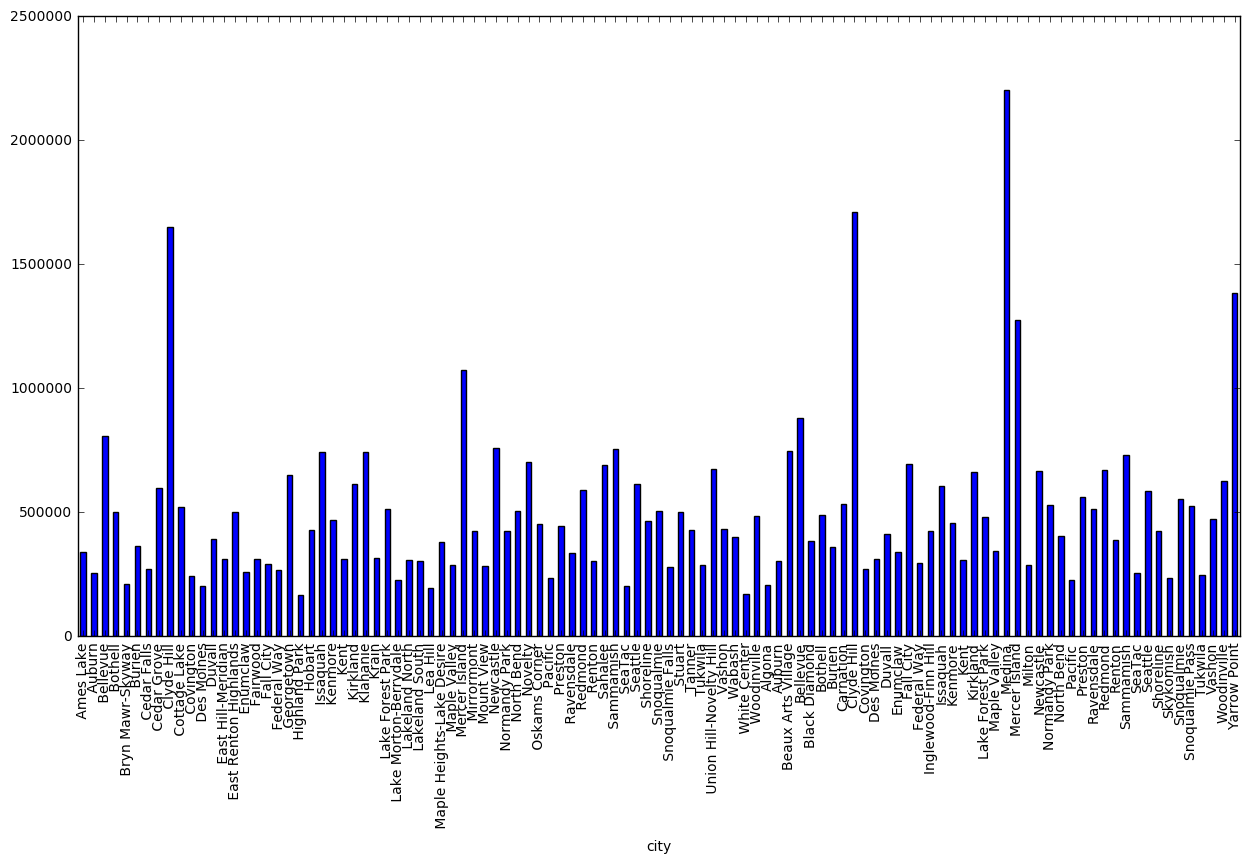

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
city_avg_price.plot(kind = 'bar')
plt.show()

# Plot the cities on map

In [32]:
# Plotting data on map: using Latitude and Longitude

from geopy.geocoders import GoogleV3
geolocator = GoogleV3()
cities = houses_data['city'].unique() # Get all the cities
locs = [geolocator.geocode(city) for city in cities ]
geo_info = pd.DataFrame([(city.latitude, city.longitude) for city in locs],
                         columns=['latitude', 'longitude'])

lon=[]  
lat=[]  
for x in geo_info['latitude'][1:1000]: lat.append(x)  
for x in geo_info['longitude'][1:1000]: lon.append(x)


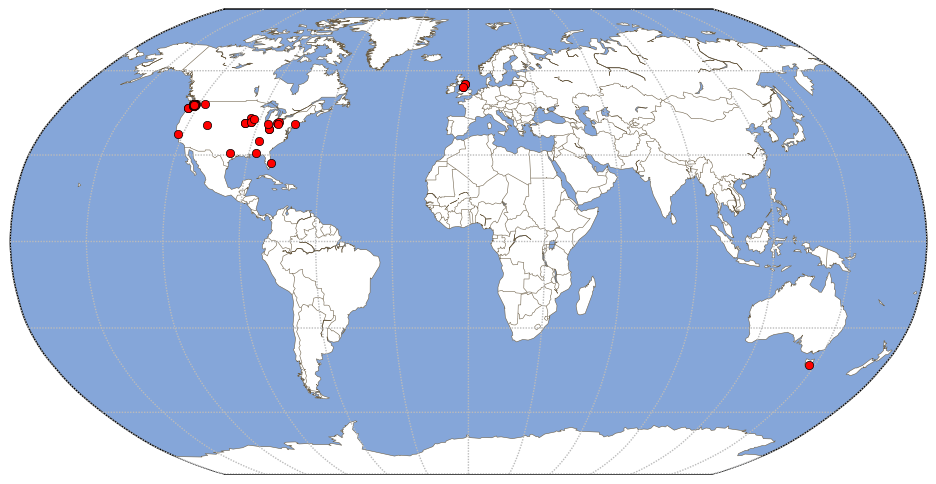

In [33]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize = (12,6)) # make it bigger first

m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
#set a background colour 
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = '#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color = '#bbbbbb')

x,y = m(lon, lat)
m.plot(x, y, 'ro', markersize=6)

plt.show()

# 2.2 Data Reshaping 

# Normalization

#Reference: http://www.damienfrancois.be/blog/pivot/entry.php?id=8

The term normalisation is used in many contexts, with distinct, but related, meanings. Basically, normalizing means transforming so as to render normal. When data are seen as vectors, normalising means transforming the vector so that it has unit norm. When data are though of as random variables, normalising means transforming to normal distribution. When the data are hypothesized to be normal, normalising means transforming to unit variance. 

Variable (column) normalisation

Why column normalisation ? The simple answer is so that variables can be compared fairly in terms of information content with respect to the target variable. This issue is most important for algorithms and models that are based on some sort of distance, such as the Euclidean distance.

Target normalisation

Why target normalisation ? Because building a model between the data elements and their associated target is made easier when the set of values to predict is rather compact. So when the distribution of the target variable is skewed, that is there are many lower values and a few higher values (e.g. the distribution of income ; the income is non-negative, most people are earn around the average, and few people make bigger money), it is preferable to transform the variable to a normal one by computing its logarithm. Then the distribution becomes more even.

In [34]:
# Calculate the correlation between the variables

corr_houses = houses_data.corr()
print "Correlation with{}".format(corr_houses['price'])

Correlation withprice           1.000000
bedrooms        0.339586
bathrooms       0.548436
sqft_living     0.607157
sqft_lot        0.080496
waterfront      0.061727
view            0.403949
condition       0.050428
yr_built        0.029605
yr_renovated    0.285271
Name: price, dtype: float64


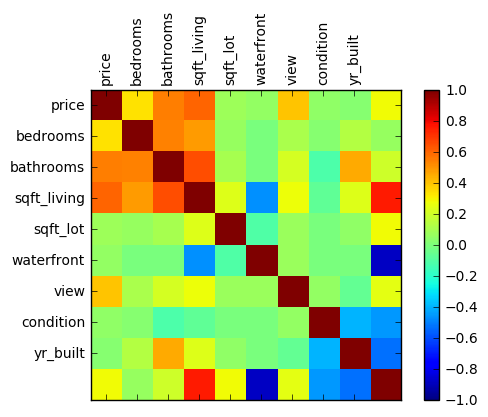

In [35]:
# Plot the correlation with the house price

from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np

names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_houses, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, )
ax.set_yticklabels(names)
plt.xticks(rotation=90)
plt.show()

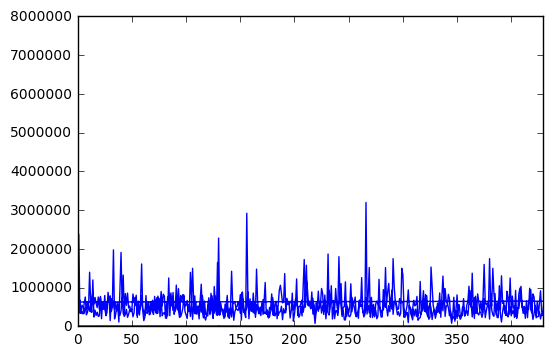

In [36]:
# There is a strong correlation between price and sqft_living

# Lets plot the price and sqft_living without normalization

houses_data["price"].plot(), houses_data["sqft_living"].plot()
plt.show()


# Normalize price and sqft_living for further analysis using z-score

In [37]:
# now iterate over the remaining columns and create a new zscore column
cols = ['price', 'sqft_living']
for col in cols:
    col_zscore = col + '_zscore'
    houses_data[col_zscore] = ((houses_data[col] - houses_data[col].mean())/houses_data[col].std(ddof=0)).abs()


In [38]:
print houses_data[['price', 'sqft_living', 'price_zscore', 'sqft_living_zscore']].head()

     price  sqft_living  price_zscore  sqft_living_zscore
0   313000       1340.0      0.657813            0.591699
1  2384000       3650.0      4.907520            1.563889
2   342000       1930.0      0.579883            0.041138
3   420000       2000.0      0.370276            0.024183
4   550000       1940.0      0.020931            0.031806


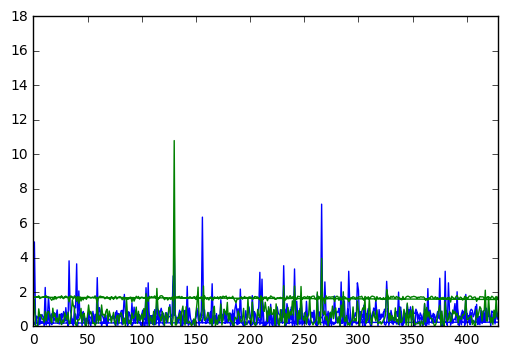

In [39]:
# After normalization 

houses_data["price_zscore"].plot(), houses_data["sqft_living_zscore"].plot()
plt.show()